In [1]:
import sys
sys.path.append('..')

In [10]:
from pathlib import Path

import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

from scripts.posenet_gridsearch import CROPPED_SIZE, load_train_data, get_center_crop

In [6]:
external_data_dir = Path('/Users/microwave/Development/data/camera_relocalization_sample_dataset/')

x, y = load_train_data(external_data_dir)

x.shape, y.shape

100%|██████████| 1000/1000 [02:14<00:00,  7.42it/s]


((1000, 240, 320, 3), (1000, 7))

In [12]:
x_centered = np.array([get_center_crop(image, CROPPED_SIZE) for image in x])

x_centered.shape

(1000, 180, 180, 3)

In [14]:
model = tf.keras.models.load_model('../models/posenet_beta_300.hdf5', compile=False)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0

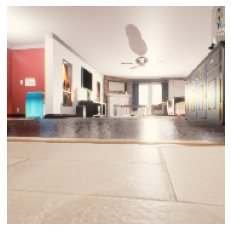

In [83]:
i = 14

image = x_centered[i]

plt.imshow(image)
plt.axis('off');

In [85]:
print(y[i])
print(model.predict(np.array([image]))[0])

[ 1.600416 -2.379502 -0.038781  0.642483  0.       -0.       -0.7663  ]
[ 1.5872816e+00 -2.9431250e+00 -3.2556094e-02  5.5368954e-01
  5.0433376e-03  2.8515491e-04 -8.9405107e-01]


In [86]:
first_pooling_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('max_pooling2d').output)

first_pooling_output = first_pooling_model.predict(np.array([image]))[0]
first_pooling_output.shape

(89, 89, 16)

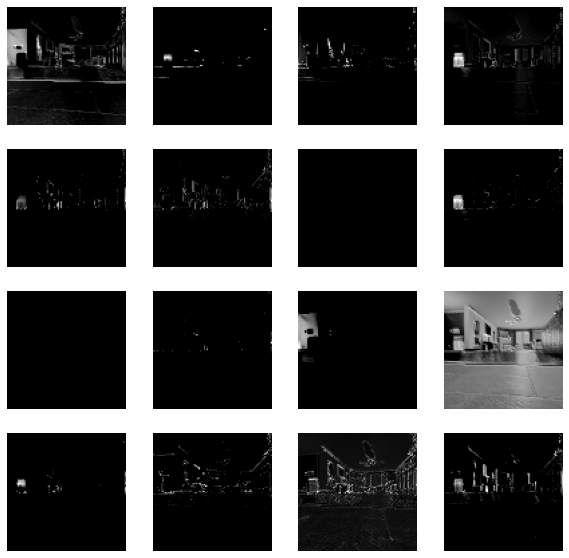

In [92]:
fig, axes = plt.subplots(nrows=4, ncols=4)
fig.set_size_inches(10, 10)
axes = axes.flatten()

for i, ax in enumerate(axes):
    output = first_pooling_output[:, :, i]
    ax.imshow(output, cmap='gray')
    ax.axis('off')

In [88]:
second_pooling_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('max_pooling2d_1').output)

second_pooling_output = second_pooling_model.predict(np.array([image]))[0]
second_pooling_output.shape

(43, 43, 32)

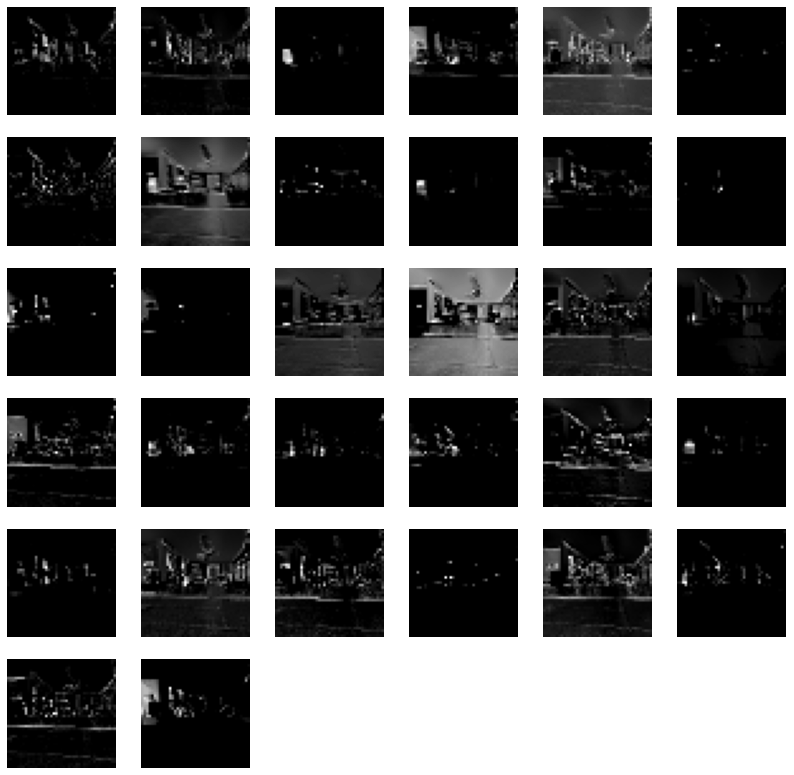

In [93]:
fig, axes = plt.subplots(nrows=6, ncols=6)
fig.set_size_inches(14, 14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < 32:
        output = second_pooling_output[:, :, i]
        ax.imshow(output, cmap='gray')

    ax.axis('off')

In [90]:
third_pooling_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('max_pooling2d_2').output)

third_pooling_output = third_pooling_model.predict(np.array([image]))[0]
third_pooling_output.shape

(20, 20, 64)

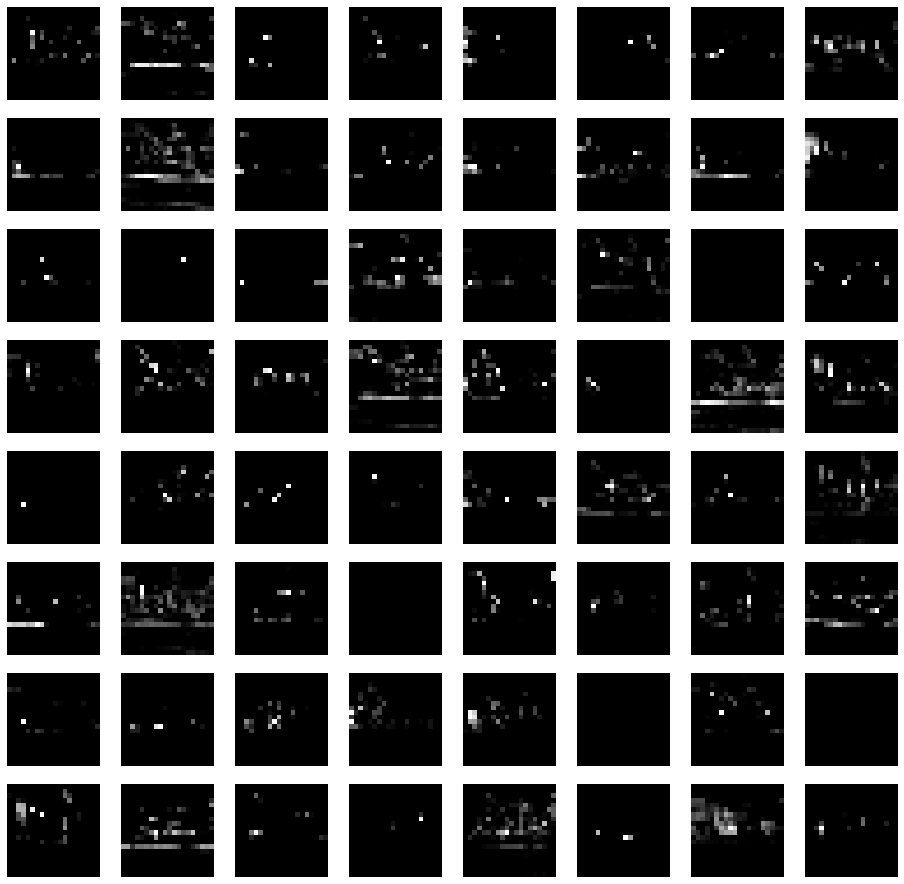

In [94]:
fig, axes = plt.subplots(nrows=8, ncols=8)
fig.set_size_inches(16, 16)
axes = axes.flatten()

for i, ax in enumerate(axes):
    output = third_pooling_output[:, :, i]
    ax.imshow(output, cmap='gray')
    ax.axis('off')